In [1]:
#### package, libraby import
import logging

import numpy as np
import pandas as pd
import pickle

#import tensorflow as tf
import keras
import matplotlib.pyplot as plt

import similaritymeasures as sm
from tensorflow.keras import backend as K

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Bidirectional, LSTM, Flatten, Dense, Reshape, UpSampling1D, TimeDistributed
from tensorflow.keras.layers import Activation, Conv1D, LeakyReLU, Dropout, Add, Layer
# from tensorflow.compat.v1.keras.layers import CuDNNLSTM as CUDNNLSTM
from tensorflow.keras.optimizers import Adam

from functools import partial
from scipy import integrate, stats

logging.basicConfig(filename='train.log', level=logging.DEBUG)
# numpy
import numpy as np
from scipy import stats
# tensorflow
import os 
# minimize the log output of the tensorflow library
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf

# graph

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20)

# path
import sys
sys.path.insert(0,'./Plant/Libs')

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Conv1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# optimizer
from tensorflow.keras.optimizers import Adam, RMSprop

# train, test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# 0.2sec Reorganizing data
normal_data = np.load('ETRI_Data_Gen/Freq_data_gen/Freq_3D_noise_gen/Freq_noise_3D_2_nM100.npy')

# data shape
print(np.shape(normal_data))

(100, 30505, 4)


In [3]:
# 센서별 데이터 추출
normal_s1 = normal_data[:, :, 0]
normal_s2 = normal_data[:, :, 1]
normal_s3 = normal_data[:, :, 2]
normal_s4 = normal_data[:, :, 3]
print(np.shape(normal_s1))
print(np.shape(normal_s2))
print(np.shape(normal_s3))
print(np.shape(normal_s4))

(100, 30505)
(100, 30505)
(100, 30505)
(100, 30505)


In [4]:
from sklearn.utils import shuffle
normal_s1 = shuffle(normal_s1, random_state=0)
normal_s2 = shuffle(normal_s2, random_state=0)
normal_s3 = shuffle(normal_s3, random_state=0)
normal_s4 = shuffle(normal_s4, random_state=0)

normal_s1 = normal_data[:, :7500, 0]
normal_s2 = normal_data[:, :7500, 1]
normal_s3 = normal_data[:, :7500, 2]
normal_s4 = normal_data[:, :7500, 3]
print(np.shape(normal_s1))
print(np.shape(normal_s2))
print(np.shape(normal_s3))
print(np.shape(normal_s4))

(100, 7500)
(100, 7500)
(100, 7500)
(100, 7500)


In [5]:
normal_sensor_data = np.zeros((100, 4 * 7500))
for ii in range(7500):
    normal_sensor_data[:,ii*4] = normal_s1[:, ii]
    normal_sensor_data[:,ii*4+1] = normal_s2[:, ii]
    normal_sensor_data[:,ii*4+2] = normal_s3[:, ii]
    normal_sensor_data[:,ii*4+3] = normal_s4[:, ii]

print(np.shape(normal_sensor_data))

(100, 30000)


In [6]:
normal_data = normal_sensor_data.T
print(np.shape(normal_data))

(30000, 100)


In [7]:
min_nor = np.min(normal_data)
max_nor = np.max(normal_data)
normal_data = (normal_data - min_nor) / (max_nor - min_nor)
normal_data.min(), normal_data.max()

(0.0, 1.0)

In [8]:
# normal_data = normal_data[:, :, np.newaxis]
# print(np.shape(normal_data))

In [9]:
# 0.2sec Reorganizing data
leak_data = np.load('ETRI_Data_Gen/Freq_data_gen/Freq_3D_leak_gen/Freq_leak_3D_2.npy')

# data shape
print(np.shape(leak_data))

(100, 66310, 4)


In [10]:
# 센서별 데이터 추출
leak_s1 = leak_data[:, :, 0]
leak_s2 = leak_data[:, :, 1]
leak_s3 = leak_data[:, :, 2]
leak_s4 = leak_data[:, :, 3]
print(np.shape(leak_s1))
print(np.shape(leak_s2))
print(np.shape(leak_s3))
print(np.shape(leak_s4))

(100, 66310)
(100, 66310)
(100, 66310)
(100, 66310)


In [11]:
from sklearn.utils import shuffle
leak_s1 = shuffle(leak_s1, random_state=0)
leak_s2 = shuffle(leak_s2, random_state=0)
leak_s3 = shuffle(leak_s3, random_state=0)
leak_s4 = shuffle(leak_s4, random_state=0)

leak_s1 = leak_data[:, :7500, 0]
leak_s2 = leak_data[:, :7500, 1]
leak_s3 = leak_data[:, :7500, 2]
leak_s4 = leak_data[:, :7500, 3]
print(np.shape(leak_s1))
print(np.shape(leak_s2))
print(np.shape(leak_s3))
print(np.shape(leak_s4))

(100, 7500)
(100, 7500)
(100, 7500)
(100, 7500)


In [12]:
leak_sensor_data = np.zeros((100, 4 * 7500))
for ii in range(7500):
    leak_sensor_data[:,ii*4] = leak_s1[:, ii]
    leak_sensor_data[:,ii*4+1] = leak_s2[:, ii]
    leak_sensor_data[:,ii*4+2] = leak_s3[:, ii]
    leak_sensor_data[:,ii*4+3] = leak_s4[:, ii]

print(np.shape(leak_sensor_data))

(100, 30000)


In [13]:
leak_data = leak_sensor_data.T
print(np.shape(leak_data))

(30000, 100)


In [14]:
min_leak = np.min(leak_data)
max_leak = np.max(leak_data)
leak_data = (leak_data - min_leak) / (max_leak - min_leak)
leak_data.min(), leak_data.max()

(0.0, 1.0)

In [15]:
# leak_data = leak_data[:, :, np.newaxis]
# print(np.shape(leak_data))

In [16]:
RANDOM_SEED = 42    # RANDOM_SEED set

In [17]:
tr_data, te_data = train_test_split(normal_data, test_size=0.33333, random_state=RANDOM_SEED)
# Print the sizes of the resulting train, validation, and test sets
print("Train set size:", len(tr_data))
print("Test set size:", len(te_data))

Train set size: 20000
Test set size: 10000


In [18]:
# Perform train-test split
leak_tr, leak_te = train_test_split(leak_data, test_size=0.33333, random_state=42)

# Print the sizes of the resulting train, validation, and test sets
print("Train set size:", len(leak_tr))
print("Test set size:", len(leak_te))

Train set size: 20000
Test set size: 10000


In [19]:
def build_encoder_layer(input_shape, encoder_reshape_shape):    
    
    input_layer = layers.Input(shape=input_shape)
    x = layers.Dense(units=100)(input_layer)
    x = layers.Dense(50)(x)
    model = Model(input_layer, x, name='encoder')
    
    return model

def build_generator_layer(input_shape, generator_reshape_shape):
    
    input_layer = layers.Input(shape=input_shape)
    x = layers.Dense(generator_reshape_shape[0])(input_layer)
    x = layers.Dense(units=50)(x)
    x = layers.Dense(100)(x)
    model = Model(input_layer, x, name='generator')
    
    return model
    

def build_critic_x_layer(input_shape):
    
    input_layer = layers.Input(shape=input_shape)
    
    x = layers.Dense(units=64)(input_layer)
    #x = layers.LeakyReLU(alpha=0.2)(x)
    # x = layers.ReLU()(x)
    # x = layers.Dropout(rate=0.1)(x)
    x = layers.Dense(units=32)(x)
    #x = layers.LeakyReLU(alpha=0.2)(x)
    # x = layers.ReLU()(x)
    # x = layers.Dropout(rate=0.1)(x)
    # x = layers.Dense(units=256)(x)
    # x = layers.LeakyReLU(alpha=0.2)(x)
    # x = layers.Dropout(rate=0.1)(x)
    x = layers.Dense(units=16)(x)
    #x = layers.LeakyReLU(alpha=0.2)(x)
    # x = layers.ReLU()(x)
    # x = layers.Dropout(rate=0.1)(x)
    x = layers.Dense(units=1, name='critic_output')(x)
    model = Model(input_layer, x, name='critic_x')
    
    return model 


def build_critic_z_layer(input_shape):
    
    input_layer = layers.Input(shape=input_shape)
    
    # x = layers.Flatten()(input_layer)
    x = layers.Dense(units=100)(input_layer)
    #x = layers.LeakyReLU(alpha=0.2)(x)
    # x = layers.ReLU()(x)
    # x = layers.Dropout(rate=0.1)(x)    
    x = layers.Dense(units=100)(x)
    #x = layers.LeakyReLU(alpha=0.2)(x)
    # x = layers.ReLU()(x)
    # x = layers.Dropout(rate=0.1)(x)  
    x = layers.Dense(units=1)(x)
    model = Model(input_layer, x, name='critic_z')
    
    return model

In [20]:
def wasserstein_loss(y_true, y_pred):
#    return tf.reduce_mean(y_true * y_pred)
    return K.mean(y_true * y_pred)*0.01

In [21]:
window_size = 100

In [22]:
# Layer Parameters
encoder_input_shape = (window_size,)
generator_input_shape = (50,)

critic_x_input_shape = (window_size,)
critic_z_input_shape = (50,)

encoder_reshape_shape = (50,)
generator_reshape_shape = (window_size//3,) # window_size//3 <- 3 is Upsampling size

learning_rate = 0.00001

# Build Model
encoder = build_encoder_layer(input_shape=encoder_input_shape,
                              encoder_reshape_shape=encoder_reshape_shape)

generator = build_generator_layer(input_shape=generator_input_shape,
                                  generator_reshape_shape=generator_reshape_shape)

critic_x = build_critic_x_layer(input_shape=critic_x_input_shape)
critic_z = build_critic_z_layer(input_shape=critic_z_input_shape)

encoder_optimizer = tf.keras.optimizers.Adam(learning_rate)
generator_optimizer = tf.keras.optimizers.Adam(learning_rate)
critic_x_optimizer = tf.keras.optimizers.Adam(learning_rate)
critic_z_optimizer = tf.keras.optimizers.Adam(learning_rate)

In [23]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
Total params: 15,150
Trainable params: 15,150
Non-trainable params: 0
_________________________________________________________________


In [24]:
generator.summary() # Latent Vector 로 부터 유사한 Trace를 생성 

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 33)                1683      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                1700      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5100      
Total params: 8,483
Trainable params: 8,483
Non-trainable params: 0
_________________________________________________________________


In [25]:
critic_x.summary() # Original input X에 대한 감시 

Model: "critic_x"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
critic_output (Dense)        (None, 1)                 17        
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [26]:
critic_z.summary()  # Generated 되는 것에 대한 감시

Model: "critic_z"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 15,301
Trainable params: 15,301
Non-trainable params: 0
_________________________________________________________________


In [27]:
latent_dim = 50
shape = (window_size,)

In [28]:
def critic_x_train_on_batch(x, z, batch_size):
    with tf.GradientTape() as tape:
        valid_x = critic_x(x)
        x_ = generator(z)
        fake_x = critic_x(x_)

        # Interpolated 
        alpha = tf.random.uniform([batch_size, 1], 0.0, 1.0)
        interpolated = alpha * x + (1 - alpha) * x_ 

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            pred = critic_x(interpolated)

        grads = gp_tape.gradient(pred, interpolated)
        grad_norm = tf.norm(tf.reshape(grads, (batch_size, -1)), axis=1)
        gp_loss = 10.0 * tf.reduce_mean(tf.square(grad_norm - 1.))

        loss1 = wasserstein_loss(-tf.ones_like(valid_x), valid_x)
        loss2 = wasserstein_loss(tf.ones_like(fake_x), fake_x)
        loss = loss1 + loss2 + gp_loss

    gradients = tape.gradient(loss, critic_x.trainable_weights)
    critic_x_optimizer.apply_gradients(zip(gradients, critic_x.trainable_weights))
    return loss

In [29]:
@tf.function
def critic_z_train_on_batch(x, z, batch_size):
    
    with tf.GradientTape() as tape:

        z_ = encoder(x)   
        valid_z = critic_z(z)             
        fake_z = critic_z(z_) 
        
        # Interpolated 
        alpha = tf.random.uniform([batch_size, 1], 0.0, 1.0)
        interpolated = alpha * z + (1 - alpha) * z_ 
                
        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            pred = critic_z(interpolated, training=True)
            
        grads = gp_tape.gradient(pred, interpolated)
        grad_norm = tf.norm(tf.reshape(grads, (batch_size, -1)), axis=1)
        gp_loss = 10.0 * tf.reduce_mean(tf.square(grad_norm - 1.))

        loss1 = wasserstein_loss(-tf.ones_like(valid_z), valid_z)
        loss2 = wasserstein_loss(tf.ones_like(fake_z), fake_z)
        loss = loss1 + loss2 + gp_loss
        
    gradients = tape.gradient(loss, critic_z.trainable_weights)
    critic_z_optimizer.apply_gradients(zip(gradients, critic_z.trainable_weights))
    return loss

In [30]:
def enc_gen_train_on_batch(x, z):
    with tf.GradientTape() as enc_tape:
        
        z_gen_ = encoder(x, training=True)
        x_gen_ = generator(z_gen_, training=False)        
        x_gen_rec = generator(z_gen_, training=False)  # 수정: z_gen_를 사용하여 재구성
        
        fake_gen_x = critic_x(x_gen_, training=False)
        fake_gen_z = critic_z(z_gen_, training=False)
        
        loss1 = wasserstein_loss(fake_gen_x, -tf.ones_like(fake_gen_x))
        loss2 = wasserstein_loss(fake_gen_z, -tf.ones_like(fake_gen_z))
        loss3 = 10.0 * tf.reduce_mean(tf.keras.losses.MSE(x, x_gen_rec))

        enc_loss = loss1 + loss2 + loss3
        
    gradients_encoder = enc_tape.gradient(enc_loss, encoder.trainable_weights)
    encoder_optimizer.apply_gradients(zip(gradients_encoder, encoder.trainable_weights))

    with tf.GradientTape() as gen_tape:
        
        z_gen_ = encoder(x, training=False)
        x_gen_ = generator(z, training=True)        
        x_gen_rec = generator(z_gen_, training=True)
        
        fake_gen_x = critic_x(x_gen_, training=False)
        fake_gen_z = critic_z(z_gen_, training=False)
        
        loss1 = wasserstein_loss(fake_gen_x, -tf.ones_like(fake_gen_x))
        loss2 = wasserstein_loss(fake_gen_z, -tf.ones_like(fake_gen_z))
        loss3 = 10.0 * tf.reduce_mean(tf.keras.losses.MSE(x, x_gen_rec))

        gen_loss = loss1 + loss2 + loss3
        
    gradients_generator = gen_tape.gradient(gen_loss, generator.trainable_weights)    
    generator_optimizer.apply_gradients(zip(gradients_generator, generator.trainable_weights))    
    return enc_loss, gen_loss

In [31]:
# Train parameters
batch_size = 64
n_critics = 1
epochs = 30

In [32]:
tr_data.shape

(20000, 100)

In [33]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [34]:
# Data Reshape
X = tr_data.reshape((-1, shape[0]))
X_ = np.copy(X)
X_.shape

(20000, 100)

In [35]:
# fake = np.ones((batch_size, 1), dtype=np.float32)
# valid = -np.ones((batch_size, 1), dtype=np.float32)
# delta = np.ones((batch_size, 1), dtype=np.float32)

epoch_e_loss = []    
epoch_g_loss = []
epoch_cx_loss = []
epoch_cz_loss = []

for epoch in range(1, epochs+1):
    
    np.random.shuffle(X_)
    
    minibatches_size = batch_size * n_critics  # 64*5 = 320 
    num_minibatches = int(X_.shape[0] // minibatches_size)  # 12 
    
    encoder.trainable = False
    generator.trainable = False
    
    for i in range(num_minibatches):
        minibatch = X_[i * minibatches_size: (i + 1) * minibatches_size]
                
        # Number of Critics 
        for j in range(n_critics):
            
            x = minibatch[j * batch_size: (j + 1) * batch_size]
            z = tf.random.normal(shape=(batch_size, latent_dim), mean=0.0, stddev=1, dtype=tf.dtypes.float32, seed=1748)
            
            critic_x.trainable = True
            critic_z.trainable = False
            epoch_cx_loss.append(critic_x_train_on_batch(x, z, batch_size))
            critic_x.trainable = False
            critic_z.trainable = True
            epoch_cz_loss.append(critic_z_train_on_batch(x, z, batch_size))
        
        critic_z.trainable = False
        critic_x.trainable = False
        encoder.trainable = True
        generator.trainable = True
        
        enc_loss, gen_loss = enc_gen_train_on_batch(x, z)
        epoch_e_loss.append(enc_loss)
        epoch_g_loss.append(gen_loss)
        
    cx_loss = np.mean(np.array(epoch_cx_loss), axis=0)
    cz_loss = np.mean(np.array(epoch_cz_loss), axis=0)
    e_loss = np.mean(np.array(epoch_e_loss), axis=0)
    g_loss = np.mean(np.array(epoch_g_loss), axis=0)
    
    print('Epoch: {}/{}, [Dx loss: {}] [Dz loss: {}] [E loss: {}] [G loss: {}]'.format(epoch, epochs, cx_loss, cz_loss, e_loss, g_loss))    

Epoch: 1/30, [Dx loss: 13.122467041015625] [Dz loss: 0.00937058124691248] [E loss: 0.18687847256660461] [G loss: 0.18619267642498016]
Epoch: 2/30, [Dx loss: 8.809182167053223] [Dz loss: 0.005028747022151947] [E loss: 0.14254604279994965] [G loss: 0.14207665622234344]
Epoch: 3/30, [Dx loss: 6.333874702453613] [Dz loss: 0.0036988682113587856] [E loss: 0.11661695688962936] [G loss: 0.11611413210630417]
Epoch: 4/30, [Dx loss: 4.839512825012207] [Dz loss: 0.0030948580242693424] [E loss: 0.09749807417392731] [G loss: 0.09692075103521347]
Epoch: 5/30, [Dx loss: 3.8860013484954834] [Dz loss: 0.002698206575587392] [E loss: 0.08263421058654785] [G loss: 0.08201351016759872]
Epoch: 6/30, [Dx loss: 3.240182638168335] [Dz loss: 0.0023988604079931974] [E loss: 0.07101338356733322] [G loss: 0.07037070393562317]
Epoch: 7/30, [Dx loss: 2.777576446533203] [Dz loss: 0.0021563514601439238] [E loss: 0.06195816025137901] [G loss: 0.06128504127264023]
Epoch: 8/30, [Dx loss: 2.430492877960205] [Dz loss: 0.001

In [36]:
test = np.concatenate((te_data, leak_te), axis=0)
test.shape

(20000, 100)

In [37]:
# te_data -> normal
enc_pred = encoder.predict(te_data)
pred = generator.predict(enc_pred)

M = np.mean(np.abs(te_data - pred))
T_small = M - np.std(te_data - pred)*0.3
T_big = M + np.std(te_data - pred)*0.3

/home/dcuai/anaconda3/envs/jin/lib/python3.6/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [38]:
a = np.std(te_data - pred)
a

0.014625792385624298

In [39]:
M

0.01092140069358512

In [40]:
# te_data
enc_pred1 = encoder.predict(test)
pred1 = generator.predict(enc_pred1)

RE = np.mean(np.abs(test - pred1), axis=1)

# 판별 결과 생성
labels_normal_test = np.where((T_small < RE) & (RE < T_big), 0, 1)
labels_normal_test = np.where((RE < T_big), 0, 1)

In [41]:
labels_normal_test.shape

(20000,)

In [42]:
y_true = np.concatenate([np.zeros(10000), np.ones(10000)])

In [43]:
acc_test = sum(y_true==labels_normal_test.reshape(-1))/len(labels_normal_test)
acc_test

0.98165

In [44]:
normal_true = np.concatenate([np.zeros(10000)])

In [45]:
leak_true = np.concatenate([np.ones(10000)])

In [46]:
T = M + np.std(te_data - pred)*0.3

In [47]:
# te_data
enc_pred1 = encoder.predict(te_data)
pred1 = generator.predict(enc_pred1)

reconstruction_error = np.mean(np.abs(te_data - pred1))
# RE = np.mean(te_data - pred1, axis=1)

# 판별 결과 생성
labels_normal_test = np.where(T < RE, 0, 1)

In [48]:
# te_data
enc_pred1 = encoder.predict(leak_te)
pred1 = generator.predict(enc_pred1)

reconstruction_error = np.mean(np.abs(leak_te - pred1))
# RE = np.mean(leak_te - pred1, axis=1)

# 판별 결과 생성
labels_normal_test = np.where(T < RE, 1, 0)

In [49]:
enc_pred3 = encoder.predict(te_data)
pred3 = generator.predict(enc_pred3)

MAE = np.mean(np.abs(te_data - pred3))
MAE

0.01092140069358512

In [50]:
enc_pred3 = encoder.predict(leak_te)
pred3 = generator.predict(enc_pred3)

MAE = np.mean(np.abs(leak_te - pred3))
MAE

0.024799191299870155

In [51]:
def actual_vs_predicted_test_data_subplot(n_show, actual_data, predicted_data, YRNG_MIN=-0.5, YRNG_MAX=0.5):
    plt.figure(figsize=(10, 12))  # 그래프 크기를 가로 20, 세로 40으로 조정
    plt.subplots_adjust(hspace=1.0)  # 세로 간격을 더 넓게 조정
    # plt.suptitle('Deep', fontsize=55)  # Add the main title

    for i in range(n_show):  # 마지막 네 개의 데이터 시각화
        idx = te_data.shape[0] - 4 + i
        plt.subplot(n_show, 1, i + 1)  # 세로로 n_show개씩 나오도록 조정
        plt.plot(actual_data[idx], color='cornflowerblue', label='Input')
        plt.plot(predicted_data[idx], color='orange', label='Output')
        plt.xlim(0, actual_data.shape[1] -1)
        # plt.ylim(0, 0.01)
        plt.xlabel('Frequency Samples', fontsize=30)
        plt.ylabel('Absolute Amplitude', fontsize=30)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(fontsize=20, loc='upper right')
        plt.text(0.5, 0.9, 'Sensor {}'.format(i + 1), transform=plt.gca().transAxes,
                 bbox=dict(facecolor='purple', alpha=0.5), ha='center', fontsize=20)
    
    plt.tight_layout()
    plt.show()

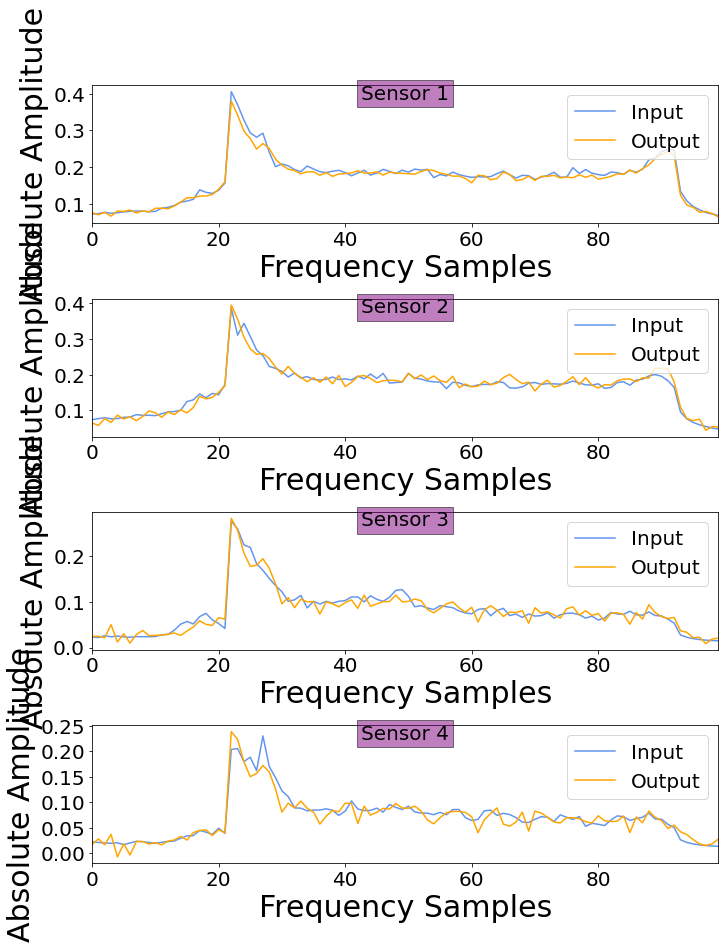

In [52]:
actual_vs_predicted_test_data_subplot(4, te_data, pred)

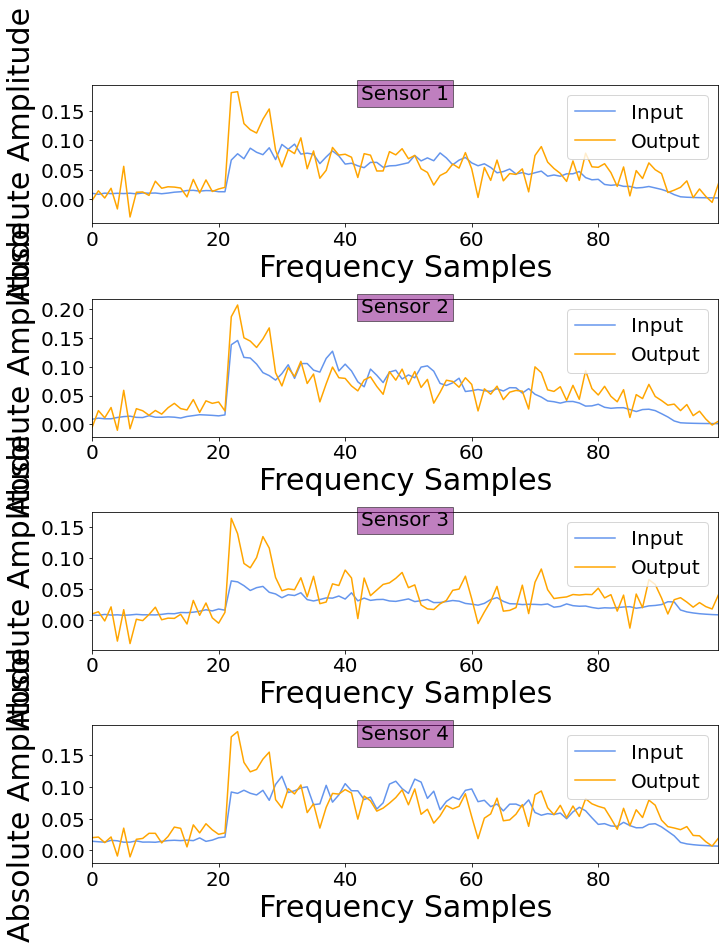

In [53]:
actual_vs_predicted_test_data_subplot(4, leak_te, pred3)